In [5]:
# 180nm_bulk.txt  zeta extraction
# NMOS -> VB > 0 / PMOS -> VB < 0 부분 선택 (LVT 부분 선택)
import pandas as pd
import numpy as np
import pprint

csv_path = "./180nm_zeta.csv"

df = pd.read_csv(csv_path, delim_whitespace=True)
vg = df['v-sweep']
vth = df['vth']

negative = df[df['v-sweep'] < 0]
positive = df[df['v-sweep'] > 0]

negative_fit = np.polyfit(negative['v-sweep'], negative['vth'], 1)
positive_fit = np.polyfit(positive['v-sweep'], positive['vth'], 1)

negative_slope = negative_fit[0]
positive_slope = positive_fit[0]

negative_slope, positive_slope

/var/folders/25/gxdw476x0bn_nw6b18t1zd_r0000gn/T/ipykernel_91475/2100210694.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(csv_path, delim_whitespace=True)


(-0.17557721214080652, -0.10305108935283214)

/var/folders/25/gxdw476x0bn_nw6b18t1zd_r0000gn/T/ipykernel_91475/456635670.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(csv_path, delim_whitespace=True)


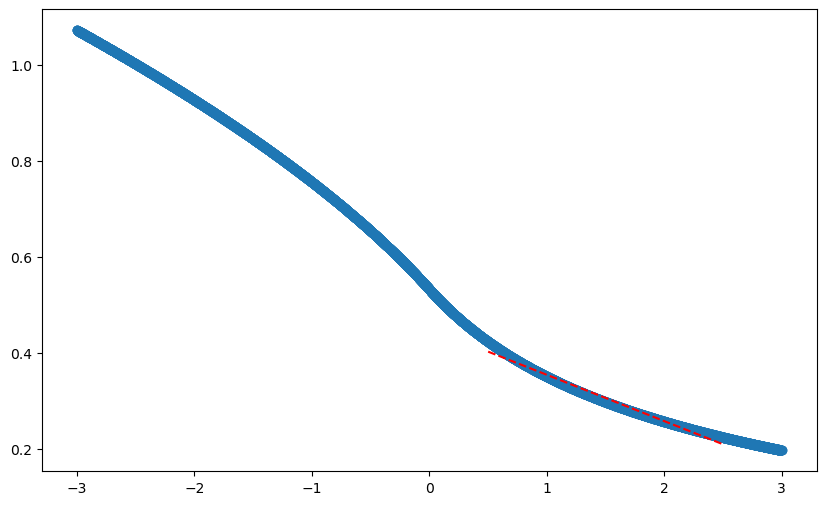

Positive Slope: -0.09647060735696222


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "./180nm_zeta.csv"

df = pd.read_csv(csv_path, delim_whitespace=True)

if 'v-sweep' in df.columns and 'vth' in df.columns :
    df['v-sweep'] = df['v-sweep'].astype(float)
    df['vth'] = df['vth'].astype(float)
    positive_sweep = df[(df['v-sweep'] > 0.5) & (df['v-sweep'] < 2.5)]
    positive_fit = np.polyfit(positive_sweep['v-sweep'], positive_sweep['vth'], 1)
    positive_slope = positive_fit[0]  # Slope of the line
    plt.figure(figsize=(10, 6))
    plt.plot(df['v-sweep'], df['vth'], 'o', label='vth')
    plt.plot(
    positive_sweep['v-sweep'],
    np.polyval(positive_fit, positive_sweep['v-sweep']),
    label='Linear Fit (Positive)',
    color='red',
    linestyle='--'
    )
        
    plt.show()
    
    print(f"Positive Slope: {positive_slope}")